## Introduction

In [1]:
# BigQuery is a web service that lets you apply SQL to huge datasets.
from google.cloud import bigquery

In [3]:
# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [4]:
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

full


In [5]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("full")

# API request - fetch the table
table = client.get_table(table_ref)

In [6]:
# Print information on all the columns in the "full" table in the "hacker_news" dataset
table.schema

[SchemaField('title', 'STRING', 'NULLABLE', None, 'Story title', (), None),
 SchemaField('url', 'STRING', 'NULLABLE', None, 'Story url', (), None),
 SchemaField('text', 'STRING', 'NULLABLE', None, 'Story or comment text', (), None),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', None, 'Is dead?', (), None),
 SchemaField('by', 'STRING', 'NULLABLE', None, "The username of the item's author.", (), None),
 SchemaField('score', 'INTEGER', 'NULLABLE', None, 'Story score', (), None),
 SchemaField('time', 'INTEGER', 'NULLABLE', None, 'Unix time', (), None),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', None, 'Timestamp for the unix time', (), None),
 SchemaField('type', 'STRING', 'NULLABLE', None, 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', (), None),
 SchemaField('id', 'INTEGER', 'NULLABLE', None, "The item's unique id.", (), None),
 SchemaField('parent', 'INTEGER', 'NULLABLE', None, 'Parent comment ID', (), None),
 SchemaField('descendants', 'INTEGER', 'NULLABL

In [7]:
# Preview the first five lines of the "full" table
client.list_rows(table, max_results=5).to_dataframe()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,"I would rather just have wired earbuds, period...",<NA>,zeveb,<NA>,1591717736,2020-06-09 15:48:56+00:00,comment,23467666,23456782,<NA>,<NA>,<NA>
1,None,None,DNS?,<NA>,nly,<NA>,1572810465,2019-11-03 19:47:45+00:00,comment,21436112,21435130,<NA>,<NA>,<NA>
2,None,None,These benchmarks seem pretty good. Filterable...,<NA>,mrkeen,<NA>,1591717727,2020-06-09 15:48:47+00:00,comment,23467665,23467426,<NA>,<NA>,<NA>
3,None,None,Oh really?<p>* Excel alone uses 86.1MB of priv...,<NA>,oceanswave,<NA>,1462987532,2016-05-11 17:25:32+00:00,comment,11677248,11676886,<NA>,<NA>,<NA>
4,None,None,These systems are useless. Of the many flaws:...,<NA>,nyxxie,<NA>,1572810473,2019-11-03 19:47:53+00:00,comment,21436113,21435025,<NA>,<NA>,<NA>


In [10]:
# Preview the first five entries in the "by" column of the "full" table
client.list_rows(table, selected_fields=table.schema[4:5], max_results=5).to_dataframe()

,by
0,zeveb
1,nly
2,mrkeen
3,oceanswave
4,nyxxie


## SELECT, FROM & WHERE

In [20]:
# Construct a reference to the "openaq" dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

# List all the tables in the "openaq" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there's only one!)
for table in tables:  
    print(table.table_id)

global_air_quality


In [21]:
# Construct a reference to the "global_air_quality" table
table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Borówiec, ul. Drapałka",Borówiec,PL,bc,0.85217,2022-04-28 07:00:00+00:00,µg/m³,GIOS,1.0,52.276794,17.074114,POINT(52.276794 1)
1,"Kraków, ul. Bulwarowa",Kraków,PL,bc,0.91284,2022-04-27 23:00:00+00:00,µg/m³,GIOS,1.0,50.069308,20.053492,POINT(50.069308 1)
2,"Płock, ul. Reja",Płock,PL,bc,1.41000,2022-03-30 04:00:00+00:00,µg/m³,GIOS,1.0,52.550938,19.709791,POINT(52.550938 1)
3,"Elbląg, ul. Bażyńskiego",Elbląg,PL,bc,0.33607,2022-05-03 13:00:00+00:00,µg/m³,GIOS,1.0,54.167847,19.410942,POINT(54.167847 1)
4,"Piastów, ul. Pułaskiego",Piastów,PL,bc,0.51000,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,52.191728,20.837489,POINT(52.191728 1)


In [22]:
# Query to select all the items from the "city" column where the "country" column is 'US'
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

# Set up the query
query_job = client.query(query)

In [23]:
# API request - run the query, and return a pandas DataFrame
us_cities = query_job.to_dataframe()

In [24]:
# What five cities have the most measurements?
us_cities.city.value_counts().head()

city
Phoenix-Mesa-Scottsdale                     39414
Los Angeles-Long Beach-Santa Ana            27479
Riverside-San Bernardino-Ontario            26887
New York-Northern New Jersey-Long Island    25417
San Francisco-Oakland-Fremont               22710
Name: count, dtype: int64

To avoid scanning too much data at once, so that you don't run over your limit, you can estimate the size of any query before running it.


In [27]:
# Query to get the score column from every row where the type column has value "job"
query = """
        SELECT score, title
        FROM `bigquery-public-data.hacker_news.full`
        WHERE type = "job" 
        """

# Only run the query if it's less than 1 MB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
job_post_scores = safe_query_job.to_dataframe()

# Print average score for job posts
job_post_scores.score.mean()

1.7267060367454068

## GROUP BY, HAVING & COUNT

In [29]:
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "full" table
table_ref = dataset_ref.table("full")
table = client.get_table(table_ref)

# Preview the first five lines of the "full" table
client.list_rows(table, max_results=5).to_dataframe()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,"I would rather just have wired earbuds, period...",<NA>,zeveb,<NA>,1591717736,2020-06-09 15:48:56+00:00,comment,23467666,23456782,<NA>,<NA>,<NA>
1,None,None,DNS?,<NA>,nly,<NA>,1572810465,2019-11-03 19:47:45+00:00,comment,21436112,21435130,<NA>,<NA>,<NA>
2,None,None,These benchmarks seem pretty good. Filterable...,<NA>,mrkeen,<NA>,1591717727,2020-06-09 15:48:47+00:00,comment,23467665,23467426,<NA>,<NA>,<NA>
3,None,None,Oh really?<p>* Excel alone uses 86.1MB of priv...,<NA>,oceanswave,<NA>,1462987532,2016-05-11 17:25:32+00:00,comment,11677248,11676886,<NA>,<NA>,<NA>
4,None,None,These systems are useless. Of the many flaws:...,<NA>,nyxxie,<NA>,1572810473,2019-11-03 19:47:53+00:00,comment,21436113,21435025,<NA>,<NA>,<NA>


In [31]:
# Query to select comments that received more than 10 replies
query_popular = """
                SELECT parent, COUNT(id) AS NumPosts
                FROM `bigquery-public-data.hacker_news.full`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """

# Set up the query (cancel the query if it would use too much of your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_popular, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
popular_comments = query_job.to_dataframe()

# Print the first five rows of the DataFrame
popular_comments.head()

,parent,NumPosts
0,7351430,46
1,7239333,43
2,9127232,529
3,2607052,274
4,33068418,339


## ORDER BY

In [41]:
# Construct a reference to the "nhtsa_traffic_fatalities" dataset
dataset_ref = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "accident_2015" table
table_ref = dataset_ref.table("accident_2015")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "accident_2015" table
client.list_rows(table, max_results=5).to_dataframe()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,30,Montana,300019,5,5,0,0,0,7,7,...,45,0,None,0,None,0,None,1,0,2015-03-28 14:58:00+00:00
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
2,49,Utah,490123,16,16,0,0,0,28,28,...,99,0,None,0,None,0,None,1,0,2015-04-14 12:24:00+00:00
3,48,Texas,481184,6,5,1,0,5,5,10,...,99,0,None,0,None,0,None,1,0,2015-05-27 16:40:00+00:00
4,41,Oregon,410333,11,11,0,0,0,14,14,...,99,0,None,0,None,0,None,1,0,2015-11-17 18:17:00+00:00


In [42]:
# Query to find out the number of accidents for each day of the week
query = """
        SELECT COUNT(consecutive_number) AS num_accidents, 
               EXTRACT(DAYOFWEEK FROM timestamp_of_crash) AS day_of_week
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(query, job_config=safe_config)

accidents_by_day = query_job.to_dataframe()
accidents_by_day

,num_accidents,day_of_week
0,5659,7
1,5298,1
2,4916,6
3,4460,5
4,4182,4
5,4038,2
6,3985,3


In [43]:
# Construct a reference to the "world_bank_intl_education" dataset
dataset_ref = client.dataset("world_bank_intl_education", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "international_education" table
table_ref = dataset_ref.table("international_education")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "international_education" table
client.list_rows(table, max_results=5).to_dataframe()

,country_name,country_code,indicator_name,indicator_code,value,year
0,Chad,TCD,"Enrolment in lower secondary education, both s...",UIS.E.2,321921.0,2012
1,Chad,TCD,"Enrolment in upper secondary education, both s...",UIS.E.3,68809.0,2006
2,Chad,TCD,"Enrolment in upper secondary education, both s...",UIS.E.3,30551.0,1999
3,Chad,TCD,"Enrolment in upper secondary education, both s...",UIS.E.3,79784.0,2007
4,Chad,TCD,"Repeaters in primary education, all grades, bo...",UIS.R.1,282699.0,2006


Which countries spend the largest fraction of GDP on education?

In [44]:
country_spend_pct_query = """                          
    SELECT country_name,
    AVG(value) AS avg_ed_spending_pct
    FROM (
          SELECT *
          FROM   `bigquery-public-data.world_bank_intl_education.international_education`
          WHERE  indicator_code = 'SE.XPD.TOTL.GD.ZS' AND
                 year BETWEEN 2010 AND 2017
          )
    GROUP BY country_name
    ORDER BY avg_ed_spending_pct DESC
"""


safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
country_spend_pct_query_job = client.query(country_spend_pct_query, job_config=safe_config)

country_spending_results = country_spend_pct_query_job.to_dataframe()
country_spending_results.head()

,country_name,avg_ed_spending_pct
0,Cuba,12.837270
1,"Micronesia, Fed. Sts.",12.467750
2,Solomon Islands,10.001080
3,Moldova,8.372153
4,Namibia,8.349610


## AS & WITH

In [45]:
# Construct a reference to the "crypto_bitcoin" dataset
dataset_ref = client.dataset("crypto_bitcoin", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "transactions" table
table_ref = dataset_ref.table("transactions")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results=5).to_dataframe()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,275,275,1,0,00000000dc55860c8a29c58d45209318fa9e9dc2c1833a...,181,2009-01-12 06:02:13+00:00,2009-01-01,1,2,4000000000.000000000,4000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'f4184...","[{'index': 0, 'script_asm': '04b5abd412d4341b4..."
1,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,275,275,1,0,0000000054487811fc4ff7a95be738aa5ad9320c394c48...,182,2009-01-12 06:12:16+00:00,2009-01-01,1,2,3000000000.000000000,3000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'a16f3...","[{'index': 0, 'script_asm': '0401518fa1d1e1e3e..."
2,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,276,276,1,0,00000000f46e513f038baf6f2d9a95b2a28d8a6c985bcf...,183,2009-01-12 06:34:22+00:00,2009-01-01,1,2,2900000000.000000000,2900000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '591e9...","[{'index': 0, 'script_asm': '04baa9d3665315562..."
3,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,276,276,1,0,00000000fb5b44edc7a1aa105075564a179d65506e2bd2...,248,2009-01-12 20:04:20+00:00,2009-01-01,1,2,2800000000.000000000,2800000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '12b56...","[{'index': 0, 'script_asm': '04bed827d37474bef..."
4,35288d269cee1941eaebb2ea85e32b42cdb2b04284a56d...,277,277,1,0,00000000689051c09ff2cd091cc4c22c10b965eb8db3ad...,545,2009-01-15 05:48:32+00:00,2009-01-01,1,2,2500000000.000000000,2500000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'd71fd...","[{'index': 0, 'script_asm': '044a656f065871a35..."


In [46]:
# Query to select the number of transactions per date, sorted by date
query_with_CTE = """ 
                 WITH time AS 
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions,
                        trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_with_CTE, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
transactions_by_date = query_job.to_dataframe()

# Print the first five rows
transactions_by_date.head()

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


<AxesSubplot: xlabel='trans_date'>

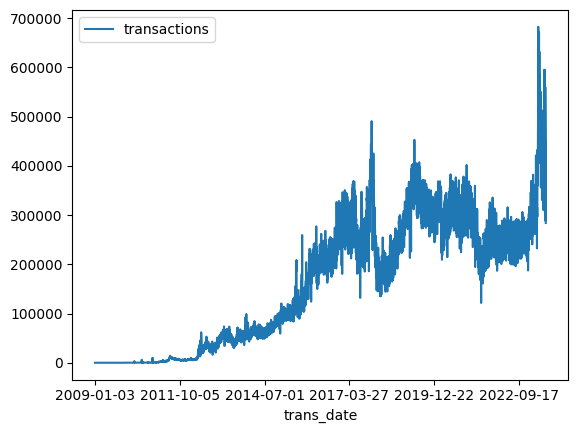

In [47]:
transactions_by_date.set_index('trans_date').plot()

In [49]:
# Construct a reference to the "chicago_taxi_trips" dataset
dataset_ref = client.dataset("chicago_taxi_trips", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

table_ref = dataset_ref.table("taxi_trips")
table = client.get_table(table_ref)
client.list_rows(table, max_results=5).to_dataframe()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,a54ef0250d9645d9589c77d92d2f9fb425c8acff,a63ecb1af39b43b49c041529edf9352a363e8732107cae...,2023-03-10 13:30:00+00:00,2023-03-10 13:45:00+00:00,1302,14.76,<NA>,<NA>,<NA>,<NA>,...,6.0,72.75,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None
1,a52a5ca0a52586e498e0286c6a0036918ccf3020,0b12c0f0c81641a43904bbce23657b88b23abf83aaaed6...,2023-03-18 07:15:00+00:00,2023-03-18 07:45:00+00:00,1332,16.81,<NA>,<NA>,<NA>,<NA>,...,36.5,98.44,Credit Card,City Service,NaN,NaN,None,NaN,NaN,None
2,a91742cc8fcb7d9778940bc64fd58fdd188b11fe,481a0e82921b8500cddb5694f01b742768e1731519ebb2...,2023-03-28 16:00:00+00:00,2023-03-28 16:30:00+00:00,1715,16.53,<NA>,<NA>,<NA>,<NA>,...,25.5,67.75,Cash,Medallion Leasin,NaN,NaN,None,NaN,NaN,None
3,a75b27e006e43dbd1913497f136e69ab0e00edba,aa798918401638e9ac120290066e3f74cc7b21e8bc6af7...,2023-03-20 22:15:00+00:00,2023-03-20 23:00:00+00:00,1887,23.35,<NA>,<NA>,<NA>,<NA>,...,35.0,91.75,Cash,Flash Cab,NaN,NaN,None,NaN,NaN,None
4,a762ae320390087aae68e267a240ecdf3289465d,624e8f2a6af3b7f032d3c40d6f925f6fc5f0bf6a358ecc...,2023-03-16 21:15:00+00:00,2023-03-16 21:45:00+00:00,2040,15.10,<NA>,<NA>,<NA>,<NA>,...,4.0,53.25,Credit Card,"Taxicab Insurance Agency, LLC",NaN,NaN,None,NaN,NaN,None


Write a query that shows, for each hour of the day in the dataset, the corresponding number of trips and average speed.

In [50]:
speeds_query = """
               WITH RelevantRides AS
               (
                   SELECT trip_start_timestamp,
                          trip_seconds,
                          trip_miles,
                          unique_key
                   FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                   WHERE trip_seconds > 0 AND
                         trip_miles > 0 AND
                         trip_start_timestamp > '2016-01-01' AND 
                         trip_start_timestamp < '2016-04-01'
               )
               SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day,
                      COUNT(unique_key) AS num_trips,
                      3600 * SUM(trip_miles) / SUM(trip_seconds) AS avg_mph
               FROM RelevantRides
               GROUP BY hour_of_day
               ORDER BY hour_of_day
               """

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**11)
speeds_query_job = client.query(speeds_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
speeds_result = speeds_query_job.to_dataframe()

# View results
print(speeds_result)

    hour_of_day  num_trips    avg_mph
0             0     203092  20.191744
1             1     178046  18.628598
2             2     143447  18.444370
3             3     108899  19.273107
4             4      80067  27.599669
5             5      75786  33.065604
6             6     102254  28.533112
7             7     187585  19.884592
8             8     284223  16.787900
9             9     306854  18.434124
10           10     279762  20.091309
11           11     294006  20.926340
12           12     311522  20.063901
13           13     317225  19.766321
14           14     312629  19.309655
15           15     319953  18.515564
16           16     349455  17.168814
17           17     394324  14.641375
18           18     431991  15.381995
19           19     416743  17.795008
20           20     356279  20.347398
21           21     318363  22.584731
22           22     289886  21.129847
23           23     241690  20.259757


## INNER JOIN

Most repos on GitHub are shared under a specific legal license, which determines the legal restrictions on how they are used. For our example, we're going to look at how many different files have been released under each license.

In [53]:
# Construct a reference to the "github_repos" dataset
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "licenses" table
licenses_ref = dataset_ref.table("licenses")

# API request - fetch the table
licenses_table = client.get_table(licenses_ref)

# Preview the first five lines of the "licenses" table
client.list_rows(licenses_table, max_results=5).to_dataframe()

,repo_name,license
0,autarch/Dist-Zilla-Plugin-Test-TidyAll,artistic-2.0
1,thundergnat/Prime-Factor,artistic-2.0
2,kusha-b-k/Turabian_Engin_Fan,artistic-2.0
3,onlinepremiumoutlet/onlinepremiumoutlet.github.io,artistic-2.0
4,huangyuanlove/LiaoBa_Service,artistic-2.0


In [54]:
# Construct a reference to the "sample_files" table
files_ref = dataset_ref.table("sample_files")

# API request - fetch the table
files_table = client.get_table(files_ref)

# Preview the first five lines of the "sample_files" table
client.list_rows(files_table, max_results=5).to_dataframe()

,repo_name,ref,path,mode,id,symlink_target
0,EOL/eol,refs/heads/master,generate/vendor/railties,40960,0338c33fb3fda57db9e812ac7de969317cad4959,/usr/share/rails-ruby1.8/railties
1,np/ling,refs/heads/master,tests/success/merger_seq_inferred.t/merger_seq...,40960,dd4bb3d5ecabe5044d3fa5a36e0a9bf7ca878209,../../../fixtures/all/merger_seq_inferred.ll
2,np/ling,refs/heads/master,fixtures/sequence/lettype.ll,40960,8fdf536def2633116d65b92b3b9257bcf06e3e45,../all/lettype.ll
3,np/ling,refs/heads/master,fixtures/failure/wrong_order_seq3.ll,40960,c2509ae1196c4bb79d7e60a3d679488ca4a753e9,../all/wrong_order_seq3.ll
4,np/ling,refs/heads/master,issues/sequence/keep.t,40960,5721de3488fb32745dfc11ec482e5dd0331fecaf,../keep.t


In [56]:
# Query to determine the number of files per license, sorted by number of files
query = """
        SELECT L.license, COUNT(1) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
file_count_by_license = query_job.to_dataframe()
file_count_by_license

,license,number_of_files
0,mit,20560894
1,gpl-2.0,16608922
2,apache-2.0,7201141
3,gpl-3.0,5107676
4,bsd-3-clause,3465437
5,agpl-3.0,1372100
6,lgpl-2.1,799664
7,bsd-2-clause,692357
8,lgpl-3.0,582277
9,mpl-2.0,457000


Write a query that returns the id, body and owner_user_id columns from the posts_answers table for answers to "bigquery"-related questions.

- You should have one row in your results for each answer to a question that has "bigquery" in the tags.
- Remember you can get the tags for a question from the tags column in the posts_questions table.

In [57]:
answers_query = """
    SELECT a.id, a.body, a.owner_user_id
    FROM `bigquery-public-data.stackoverflow.posts_questions` AS q
    INNER JOIN `bigquery-public-data.stackoverflow.posts_answers` AS a
        ON a.parent_id = q.id
    WHERE q.tags LIKE '%bigquery%'
"""

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=27*10**10)
answers_query_job = client.query(answers_query, job_config=safe_config)

answers_results = answers_query_job.to_dataframe()
print(answers_results.head())

         id                                               body  owner_user_id
0  70829124  <p>Maybe use <code>purrr::map_dfr()</code>? It...        4650934
1  70831418  <p>Problem can also stem from DATETIME format....       17900990
2  70835813  <p>I am not all that familiar with the dataset...       17974332
3  70836242  <p>add 1 columnXYZ with autogenerated number o...       17480666
4  70837609  <p>The activity has a note after the creation ...       17918250
